# Análise da correlação entre as features do dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
df = pd.read_csv('neo.csv')
df.head(10)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
5,54138696,(2021 GY23),0.036354,0.081291,34297.587778,4.058569e+07,Earth,False,24.32,False
6,54189957,(2021 PY40),0.171615,0.383743,27529.472307,2.906912e+07,Earth,False,20.95,False
7,54230078,(2021 XD6),0.005328,0.011914,57544.470083,5.511502e+07,Earth,False,28.49,False
8,2088213,88213 (2001 AF2),0.350393,0.783502,56625.210122,6.903598e+07,Earth,False,19.40,False
9,3766065,(2016 YM),0.105817,0.236614,48425.840329,3.835526e+07,Earth,False,22.00,False


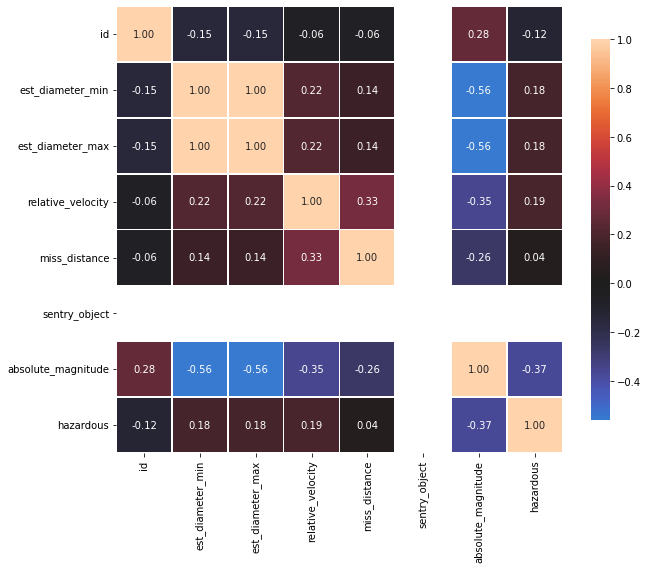

In [34]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df)

Visualizando as correlações existentes entre as features, concluímos que "est_diameter_min","est_diameter_max","relative_velocity","miss_distance" e "absolute_magnitude" são relevantes no cálculo da ameaça do asteroide, enquanto podemos excluir features destinadas à identificação.

# Elaboração da ANN baseada em Keras

In [28]:
import pandas as pd

def normalize(x_train, x_test):
    mean = x_train.mean(axis=0)
    x_train -= mean
    std = x_train.std(axis=0)
    x_train /= std

    x_test -= mean
    x_test /= std



relevant_rows = ["est_diameter_min","est_diameter_max","relative_velocity","miss_distance","absolute_magnitude","hazardous"]
dataset = pd.read_csv(open('neo.csv', "rb"))[relevant_rows]

test_dataset = dataset.sample(frac=0.3)

train_dataset = dataset.drop(test_dataset.index)

y_train = train_dataset["hazardous"]
y_test = test_dataset["hazardous"]

x_train = train_dataset.drop(columns=["hazardous"])
x_test = test_dataset.drop(columns=["hazardous"])

normalize(x_train, x_test)

In [5]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

In [8]:
model.add(Dense(10, activation='relu', input_dim=5))

In [9]:
model.add(Dense(10, activation='relu'))

In [10]:
model.add(Dense(units=1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
metrics=['accuracy'])

In [29]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
497/497 [==============================] - 2s 2ms/step - loss: 0.2998 - accuracy: 0.8912 - val_loss: 0.2030 - val_accuracy: 0.9072
Epoch 2/10
497/497 [==============================] - 1s 2ms/step - loss: 0.1967 - accuracy: 0.9085 - val_loss: 0.1927 - val_accuracy: 0.9085
Epoch 3/10
497/497 [==============================] - 1s 2ms/step - loss: 0.1907 - accuracy: 0.9099 - val_loss: 0.1891 - val_accuracy: 0.9096
Epoch 4/10
497/497 [==============================] - 1s 2ms/step - loss: 0.1883 - accuracy: 0.9110 - val_loss: 0.1874 - val_accuracy: 0.9109
Epoch 5/10
497/497 [==============================] - 1s 2ms/step - loss: 0.1872 - accuracy: 0.9111 - val_loss: 0.1865 - val_accuracy: 0.9120
Epoch 6/10
497/497 [==============================] - 2s 3ms/step - loss: 0.1866 - accuracy: 0.9117 - val_loss: 0.1857 - val_accuracy: 0.9124
Epoch 7/10
497/497 [==============================] - 1s 2ms/step - loss: 0.1862 - accuracy: 0.9117 - val_loss: 0.1853 - val_accuracy: 0.9124
Epoch 

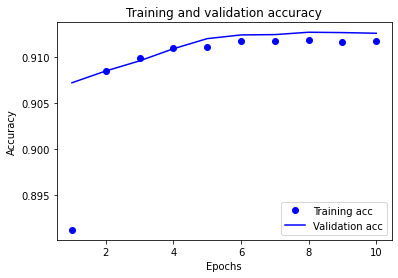

In [33]:
#Visualização da acurácia ao longo do tempo
import matplotlib.pyplot as plt
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()